In [2]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud #pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

#All these packages need to be installed from pip
#For ML
import sklearn
# import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

import pyanno #On python3 make sure to pip install pyanno3

#We need to import these this way due to how pyanno is setup
from pyanno.measures import pairwise_matrix, agreement, cohens_kappa, cohens_weighted_kappa, fleiss_kappa, krippendorffs_alpha, pearsons_rho, scotts_pi, spearmans_rho
from pyanno.annotations import AnnotationsContainer
from pyanno.models import ModelA, ModelBt, ModelB

from functools import reduce
from itertools import permutations
import math

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

## <font color="red">*Exercise 1*</font>

<font color="red">Perform a content annotation survey of some kind in which at least 3 people evaluate and code each piece of content, using Amazon Mechanical Turk as described in the [MTurk slides on Canvas](https://canvas.uchicago.edu/courses/39937/files/6674661?wrap=1), or by hand with friends.  With the resulting data, calculate, visualize and discuss inter-coder agreement or covariation with appropriate metrics. What does this means for the reliability of human assessments regarding content in your domain?

I invited three friends to code a subset (100) of youtube investment analyst I scrapped. Non-investment related channels are coded with 0 and investment related channels are coded with 1.

The metrics scores following are quite good, suggesting human assessment regarding the content is reliable.

In [116]:
channels = pandas.read_csv('channels_short.csv')

In [122]:
channels[['coder1','coder2','coder3']]

,coder1,coder2,coder3
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1
...,...,...,...
95,0,0,0
96,1,1,1
97,1,1,1
98,1,1,1


In [124]:
np.shape(np.array(channels[['coder1','coder2','coder3']]))

(100, 3)

In [125]:
x = np.array(channels[['coder1','coder2','coder3']])
anno = AnnotationsContainer.from_array(x, missing_values=[-1])

In [126]:
anno.labels

[0, 1]

In [128]:
pyanno.measures.agreement.labels_frequency(anno.annotations,2)

array([0.11333333, 0.88666667])

[[ 9.  1.]
 [ 3. 87.]]


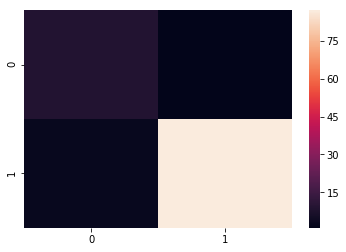

In [129]:
c = pyanno.measures.agreement.confusion_matrix(anno.annotations[:,0], anno.annotations[:,1],2)
print(c)
ac = seaborn.heatmap(c)
plt.show()

In [130]:
scotts_pi(anno.annotations[:,0], anno.annotations[:,1])

0.7957099080694584

In [140]:
fleiss_kappa(anno.annotations)

0.8341441839893852

In [137]:
krippendorffs_alpha(anno.annotations)

0.8346970367094206

In [141]:
cohens_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.7959183673469385

In [142]:
m = pairwise_matrix(cohens_kappa, anno.annotations)
print(m)

[[1.         0.79591837 0.79591837]
 [0.79591837 1.         0.90530303]
 [0.79591837 0.90530303 1.        ]]


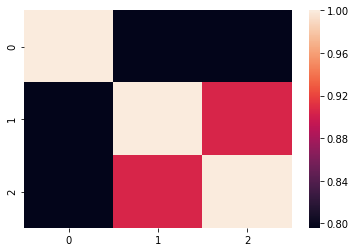

In [143]:
ax = seaborn.heatmap(m)
plt.show()

In [144]:
def pairwise_metric_average(metric, array):
    """Calculate the pairwise metric average for the real elements of metric function run on an array of annotations"""
    p = permutations(range(array[0,:].size),2)
    m = [metric(array[:,x[0]], array[:,x[1]]) for x in p]
    clean_m = [c for c in m if not math.isnan(c)]
    return reduce(lambda a, b: a + b, clean_m)/len(clean_m)    
 
pairwise_metric_average(cohens_kappa, anno.annotations)

0.8323799216656358

In [145]:
cohens_weighted_kappa(anno.annotations[:,0], anno.annotations[:,1])

0.7959183673469388

In [146]:
pairwise_metric_average(cohens_weighted_kappa,anno.annotations)

0.8323799216656359

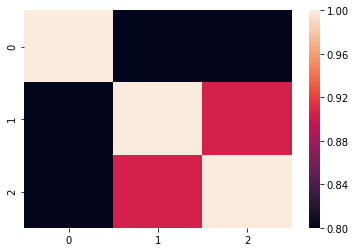

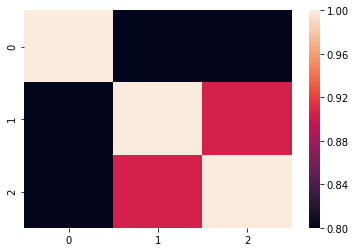

In [147]:
n = pairwise_matrix(pearsons_rho, anno.annotations)
m = pairwise_matrix(spearmans_rho, anno.annotations)
an = seaborn.heatmap(n)
plt.show()
am = seaborn.heatmap(m)
plt.show()

In [148]:
print(pairwise_metric_average(pearsons_rho,anno.annotations), pairwise_metric_average(spearmans_rho,anno.annotations))

0.8351641376781186 0.8351641376781186


## <font color="red">*Exercise 2*</font>

<font color="red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<font color="red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

SVC with linear kenel performs the best for News group dataset, Senate Small, and Senate Large dataset.

SVC with linear kenel performs the best for dataset1 and dataset9.

SVC with polynomial kenel performs the best for dataset2.

Gradient Boosting Classifier performs the best for dataset3, dataset7 and dataset10.

Naive bayes classifer performs the best for dataset4, dataset5, dataset6, dataset8.


In [4]:
#datasets
noise = .2

dfTrain2, dfTest2 = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)
dfTrain3, dfTest3 = sklearn.model_selection.train_test_split(lucem_illud.xorSplit(noise), test_size=.2)
dfTrain4, dfTest4 = sklearn.model_selection.train_test_split(lucem_illud.targetSplit(noise), test_size=.2)
dfTrain1, dfTest1 = sklearn.model_selection.train_test_split(lucem_illud.multiBlobs(noise), test_size=.2)

noise = .5

dfTrain6, dfTest6 = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)
dfTrain7, dfTest7 = sklearn.model_selection.train_test_split(lucem_illud.xorSplit(noise), test_size=.2)
dfTrain8, dfTest8 = sklearn.model_selection.train_test_split(lucem_illud.targetSplit(noise), test_size=.2)
dfTrain5, dfTest5 = sklearn.model_selection.train_test_split(lucem_illud.multiBlobs(noise), test_size=.2)

noise = .8
dfTrain9, dfTest9 = sklearn.model_selection.train_test_split(lucem_illud.andSplit(noise), test_size=.2)
dfTrain10, dfTest10 = sklearn.model_selection.train_test_split(lucem_illud.xorSplit(noise), test_size=.2)



In [6]:
import sklearn.naive_bayes

In [7]:
#models
#Bayes
clf1 = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf2 = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
clf3 = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf4 = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
clf5 = sklearn.linear_model.LogisticRegression()

#Symbolists
clf6 = sklearn.tree.DecisionTreeClassifier()
clf7 = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf8 = sklearn.neural_network.MLPClassifier()

#Ensemble
clf9 = sklearn.ensemble.GradientBoostingClassifier()

In [8]:
clfs = [clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, clf9]
data = [(dfTrain1, dfTest1), (dfTrain2, dfTest2), (dfTrain3, dfTest3),
        (dfTrain4, dfTest4), (dfTrain5, dfTest5), (dfTrain6, dfTest6),
       (dfTrain7, dfTest7), (dfTrain8, dfTest8), (dfTrain9, dfTest9), (dfTrain10, dfTest10)]


In [16]:
for i, clf in enumerate(clfs):
    for j, d in enumerate(data):
        print('clf', i+1)
        print('dataset', j+1)
        clf.fit(np.stack(d[0]['vect'], axis=0), d[0]['category'])
        print(lucem_illud.evaluateClassifier(clf, d[1]))

clf 1
dataset 1
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.032  0.953750   0.911765           0.861941  0.930000
1              0.058  0.907354   0.872549           0.771589  0.847619
2              0.000  1.000000   1.000000           1.000000  1.000000
3              0.026  0.962815   0.934579           0.893679  0.943396
4              0.000  1.000000   1.000000           1.000000  1.000000
clf 1
dataset 2
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.135  0.865   0.884211           0.822737    0.84
1              0.135  0.865   0.847619           0.809381    0.89
clf 1
dataset 3
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.44  0.561425   0.543860        

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.148  0.791763   0.628319           0.497113  0.689320
2              0.014  0.978100   0.955056           0.928497  0.965909
3              0.014  0.974354   0.966667           0.932176  0.956044
4              0.148  0.771263   0.686275           0.512922  0.625000
clf 2
dataset 6
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.26  0.739896   0.745098           0.685171  0.745098
1               0.26  0.739896   0.734694           0.669775  0.734694
clf 2
dataset 7
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.515  0.47995   0.450000       

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.475  0.541667   0.489362           0.482021  0.750000
1              0.475  0.541667   0.610169           0.563390  0.333333
clf 3
dataset 1
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.032  0.957500   0.903846           0.861615  0.940000
1              0.058  0.903858   0.880000           0.771524  0.838095
2              0.000  1.000000   1.000000           1.000000  1.000000
3              0.026  0.962815   0.934579           0.893679  0.943396
4              0.000  1.000000   1.000000           1.000000  1.000000
clf 3
dataset 2
          Error_Rate   AUC  Precision  Average_Precision  Recall
Category                                                        
0               0.11  0.89   0.861111           0.835833 

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.004  0.997462   0.981481           0.981481  1.000000
1              0.156  0.811890   0.595420           0.500900  0.757282
2              0.010  0.980527   0.977011           0.949704  0.965909
3              0.010  0.985344   0.967391           0.950130  0.978022
4              0.156  0.728001   0.707317           0.474289  0.517857
clf 3
dataset 6
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.28  0.717687   0.685484           0.656237  0.833333
1               0.28  0.717687   0.776316           0.662374  0.602041
clf 3
dataset 7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.255  0.734085   0.907407    

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.35  0.630837   0.720000           0.561739  0.391304
1               0.35  0.630837   0.626667           0.615432  0.870370
clf 4
dataset 1
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.036  0.947500   0.901961           0.845804  0.920000
1              0.064  0.903556   0.847619           0.750458  0.847619
2              0.000  1.000000   1.000000           1.000000  1.000000
3              0.028  0.954650   0.942308           0.887190  0.924528
4              0.000  1.000000   1.000000           1.000000  1.000000
clf 4
dataset 2
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.155  0.845   0.855670           0.7952

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.32  0.679672   0.682692           0.630207  0.696078
1               0.32  0.679672   0.677083           0.614086  0.663265
clf 6
dataset 7
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.235  0.763659   0.760870           0.685641  0.736842
1              0.235  0.763659   0.768519           0.717496  0.790476
clf 6
dataset 8
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.3  0.69881   0.645161           0.579939  0.689655
1                0.3  0.69881   0.747664           0.694319  0.707965
clf 6
dataset 9
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                         

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.030  0.958750   0.912621           0.869864  0.940000
1              0.058  0.903858   0.880000           0.771524  0.838095
2              0.000  1.000000   1.000000           1.000000  1.000000
3              0.028  0.961546   0.925926           0.885515  0.943396
4              0.000  1.000000   1.000000           1.000000  1.000000
clf 8
dataset 2
          Error_Rate    AUC  Precision  Average_Precision  Recall
Category                                                         
0              0.135  0.865   0.868687           0.817071    0.86
1              0.135  0.865   0.861386           0.814406    0.87
clf 8
dataset 3


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0                0.1  0.89956   0.914894           0.862866  0.877551
1                0.1  0.89956   0.886792           0.857240  0.921569
clf 8
dataset 4


/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.135  0.856109   0.838710           0.820818  0.936937
1              0.135  0.856109   0.907895           0.803873  0.775281
clf 8
dataset 5
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.000  1.000000   1.000000           1.000000  1.000000
1              0.150  0.779719   0.629630           0.485678  0.660194
2              0.014  0.978100   0.955056           0.928497  0.965909
3              0.014  0.974354   0.966667           0.932176  0.956044
4              0.150  0.776325   0.672897           0.512577  0.642857
clf 8
dataset 6
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.255  0.744798   0.747573    

/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.225  0.778405   0.714286           0.659713  0.804598
1              0.225  0.778405   0.833333           0.766844  0.752212
clf 8
dataset 9
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.38  0.623397   0.586207           0.555230  0.708333
1               0.38  0.623397   0.666667           0.598974  0.538462
clf 8
dataset 10
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.33  0.667069   0.644444           0.576280  0.630435
1               0.33  0.667069   0.690909           0.646195  0.703704
clf 9
dataset 1
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                    

In [14]:
#Newsgroups, Senate Small, Senate Large, Email Spam
dfTraina, dfTesta = lucem_illud.trainTestSplit(lucem_illud.loadNewsGroups())
dfTrainb, dfTestb = lucem_illud.trainTestSplit(lucem_illud.loadSenateSmall())
dfTrainc, dfTestc = lucem_illud.trainTestSplit(lucem_illud.loadSenateLarge())

Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Klobuchar
Loading senator: Kyl
Loading senator: Kerry
Loading senator: Kohl
Loading senator: Kennedy
Converting to vectors


In [15]:
real_data = [(dfTraina, dfTesta, 'News Groups'), 
             (dfTraina, dfTesta, 'Senate Small'), (dfTrainc, dfTestc, 'Senate Large')]

In [17]:
for i, clf in enumerate(clfs):
    for j, d in enumerate(real_data):
        print('clf', i+1)
        print('dataset', d[2])
        clf.fit(np.stack(d[0]['vect'], axis=0), d[0]['category'])
        print(lucem_illud.evaluateClassifier(clf, d[1]))

clf 1
dataset News Groups
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.sys.mac.hardware    0.148936  0.816970   0.689922           0.579822   
rec.autos                0.089362  0.870350   0.798077           0.681608   
comp.windows.x           0.070213  0.915837   0.864662           0.796808   
misc.forsale             0.121277  0.819266   0.788462           0.627065   

                         Recall  
Category                         
comp.sys.mac.hardware  0.747899  
rec.autos              0.798077  
comp.windows.x         0.884615  
misc.forsale           0.700855  
clf 1
dataset Senate Small
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.sys.mac.hardware    0.148936  0.816970   0.689922           0.579822   
rec.autos                0.089362  0.870350   0.7

/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
comp.sys.mac.hardware    0.253191  0.5   0.000000           0.253191     0.0
rec.autos                0.778723  0.5   0.221277           0.221277     1.0
comp.windows.x           0.276596  0.5   0.000000           0.276596     0.0
misc.forsale             0.248936  0.5   0.000000           0.248936     0.0
clf 3
dataset Senate Small


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


                       Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                                    
comp.sys.mac.hardware    0.253191  0.5   0.000000           0.253191     0.0
rec.autos                0.778723  0.5   0.221277           0.221277     1.0
comp.windows.x           0.276596  0.5   0.000000           0.276596     0.0
misc.forsale             0.248936  0.5   0.000000           0.248936     0.0
clf 3
dataset Senate Large


/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


           Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                        
Kohl         0.094872  0.5   0.000000           0.094872     0.0
Kyl          0.130769  0.5   0.000000           0.130769     0.0
Kerry        0.266667  0.5   0.000000           0.266667     0.0
Kennedy      0.585897  0.5   0.414103           0.414103     1.0
Klobuchar    0.093590  0.5   0.000000           0.093590     0.0
clf 4
dataset News Groups
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.sys.mac.hardware    0.431915  0.538641   0.287879           0.269806   
rec.autos                0.448936  0.549995   0.257919           0.241359   
comp.windows.x           0.225532  0.592308   1.000000           0.410147   
misc.forsale             0.255319  0.530036   0.444444           0.268988   

                         Recall  
Category              

                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.sys.mac.hardware    0.074468  0.900153   0.855932           0.764761   
rec.autos                0.070213  0.923944   0.798319           0.748383   
comp.windows.x           0.019149  0.972511   0.976378           0.944080   
misc.forsale             0.082979  0.873332   0.867925           0.735662   

                         Recall  
Category                         
comp.sys.mac.hardware  0.848739  
rec.autos              0.913462  
comp.windows.x         0.953846  
misc.forsale           0.786325  
clf 8
dataset Senate Large
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kohl         0.002564  0.986486   1.000000           0.975537  0.972973
Kyl          0.015385  0.953670   0.968750           0.894811  0.911765
Kerry        0.032

## <font color="red">*Exercise 3*</font>

<font color="red">In the cells immediately following, perform logistic regression classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk in Exercise 1). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


The logistic classifier in general performs well in distinguishing fake news and real news.

In [18]:
fknews = pandas.read_csv('fakenews.csv')

In [19]:
fknews.head()

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real


In [20]:
holdBackFraction = .2
train_data_df, test_data_df = sklearn.model_selection.train_test_split(fknews, test_size=holdBackFraction)

In [21]:
print(len(train_data_df))
print(len(test_data_df))

5136
1284


In [22]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['tweet'])

In [23]:
TFVects.shape

(5136, 5692)

In [24]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

In [26]:
train_data_df['pca'] = [r for r in reduced_data]

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [32]:
def helper(x):
    if x =='fake':
        rv = False
    else:
        rv = True
    return rv

In [33]:
train_data_df['category']=train_data_df['label'].apply(helper)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
test_data_df['category']=test_data_df['label'].apply(helper)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
train_data_df.head()

,id,tweet,label,vect,pca,category
5797,5798,$3 trillion for federal coronavirus stimulus p...,fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.014477706178702135, -0.013978325111586122,...",False
1540,1541,Pedro Sanchez president of government of Spain...,fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.010983810096409991, -0.01010509717303584, ...",False
3510,3511,In a photo of Pakistani Prime Minister Imran K...,fake,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[-0.018870729565811022, -0.02070767639957562, ...",False
2914,2915,South Carolina reported 72 new deaths 30 more ...,real,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.005750529006751852, -0.012886712184129645, ...",True
2425,2426,#CoronaVirusUpdates: 📍Total #COVID19 Cases in ...,real,"[0.0, 0.0, 0.0, 0.0, 0.2951450981094504, 0.0, ...","[0.041181630742350046, -0.003889286478694469, ...",True


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


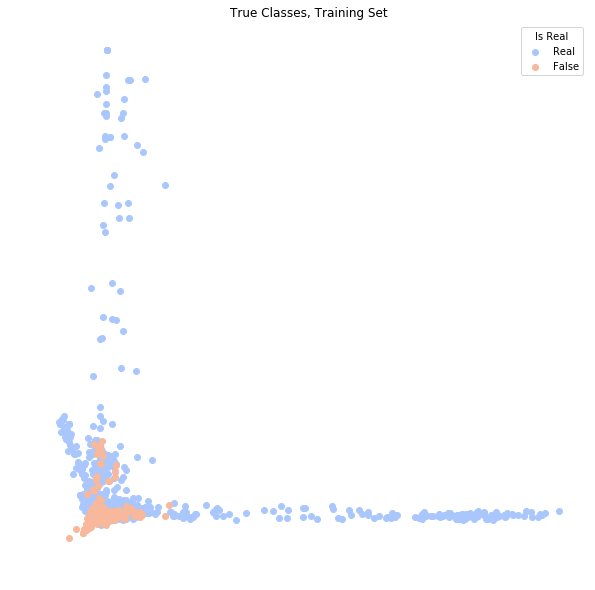

In [38]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Real
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "Real")

#Plot not False
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Real')
plt.title('True Classes, Training Set')
plt.show()

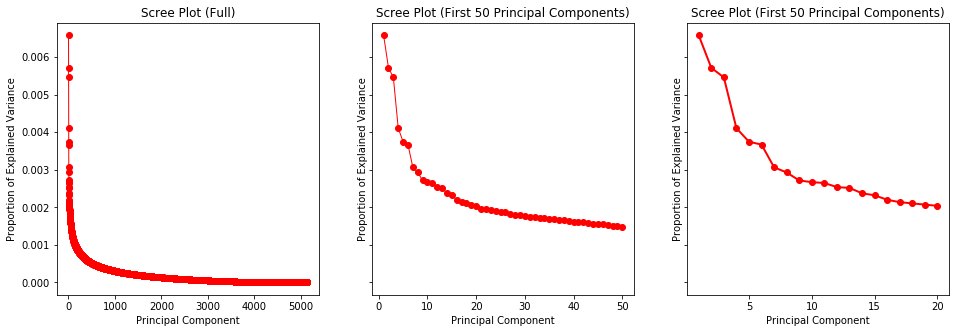

In [39]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

In [40]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Now we fit a logistic regression to our data.

In [41]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [42]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.798481308411215

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [46]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['tweet'])
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

0.8146417445482866

Slightly poorer. How about using more dimensions (40)?

In [47]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.8481308411214953
Testing:
0.867601246105919


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Or still more (100)?

In [48]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8679906542056075
Testing:
0.882398753894081


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Or even more (200)!

In [49]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8822040498442367
Testing:
0.8917445482866043


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


This is becoming ridiculous (400)!

In [50]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Training:
0.9032320872274143
Testing:
0.8933021806853583


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [51]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9618380062305296


In [111]:
lucem_illud.evaluateClassifier(logistic_l1, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.081776,0.917719,0.914573,0.874317,0.910000
True,0.081776,0.917719,0.921397,0.892416,0.925439


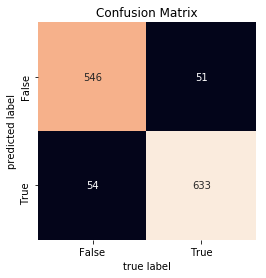

In [112]:
lucem_illud.plotConfusionMatrix(logistic_l1, test_data_df)

Train the model using training data, and then test it on the testing data.

In [52]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.9182242990654206


## <font color="red">*Exercise 4*</font>

<font color="red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

The tree classifiers perform well in predicting fake news but not so well for true news.

Ensemble learnings aggregates the predictions from multiple models, e.g., bagging averages multiple trees.

In [53]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [56]:
bag.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=0.8, n_estimators=100, n_jobs=None, oob_score=False,
         random_state=1, verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


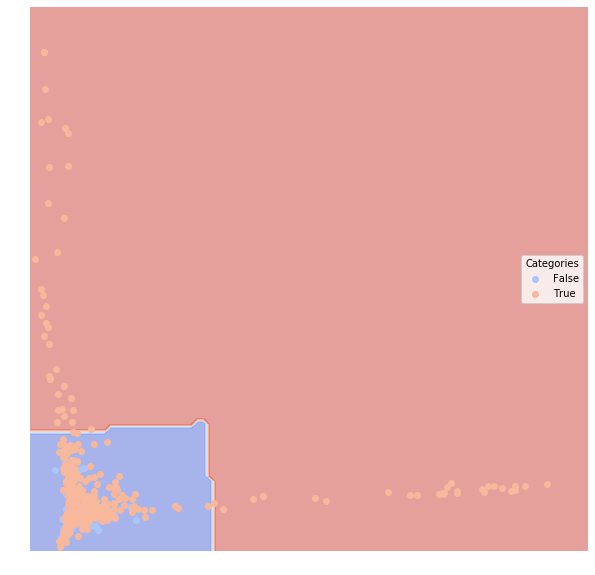

In [57]:
lucem_illud.plotregions(bag, test_data_df)

In [58]:
lucem_illud.evaluateClassifier(bag, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.292835,0.72402,0.617400,0.614648,0.981667
True,0.292835,0.72402,0.966667,0.735096,0.466374


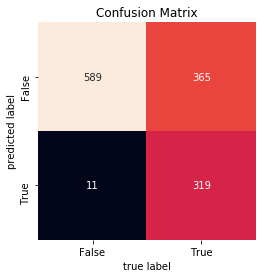

In [59]:
lucem_illud.plotConfusionMatrix(bag, test_data_df)

In [62]:
rf = sklearn.ensemble.RandomForestClassifier(max_depth=10, n_estimators=100, max_features=0.5)

In [64]:
rf.fit(np.stack(train_data_df['vect'], axis =0), train_data_df['category']) #Fit the bagged classifier

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [65]:
lucem_illud.evaluateClassifier(rf, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.291277,0.72538,0.618947,0.615914,0.98000
True,0.291277,0.72538,0.964072,0.735778,0.47076


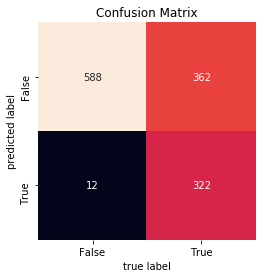

In [66]:
lucem_illud.plotConfusionMatrix(rf, test_data_df)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


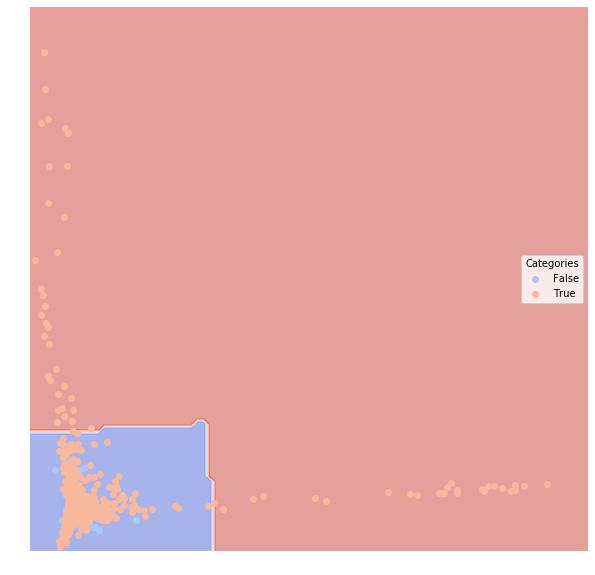

In [110]:
lucem_illud.plotregions(rf, test_data_df)

## <font color="red">*Exercise 5*</font>

<font color="red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

The KNN classifier does not perform well on the fake news dataset. It seems to classify all news to fake news.

KNN and K-means sounds similar as they both have the hyperparameter 'k', but they are very different methods - the former one classify data by looking at its k nearest neigbors, whereas the latter one is a unsupervised method that cluster data into k number of groups.

In [67]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

In [68]:
clf_knearest.fit(np.stack(train_data_df['vect'], axis = 0), train_data_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [69]:
lucem_illud.evaluateClassifier(clf_knearest, train_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.46067,0.557922,0.509739,0.509739,1.000000
True,0.46067,0.557922,1.000000,0.576514,0.115845


In [70]:
test_data_df['nb_predict'] = clf_knearest.predict(np.stack(test_data_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Testing score:
0.5280373831775701


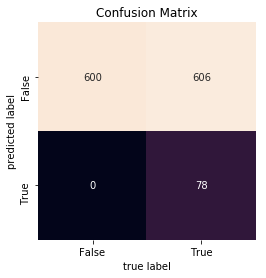

In [71]:
lucem_illud.plotConfusionMatrix(clf_knearest, test_data_df)

## <font color="red">*Exercise 6*</font>

<font color="red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, logistic and decision-tree approaches?

The Neural network classifier performs better than all the methods above for the test data set.

In [72]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [73]:
lucem_illud.evaluateClassifier(clf_nn, test_data_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
False,0.098131,0.900322,0.910035,0.855429,0.876667
True,0.098131,0.900322,0.895184,0.867628,0.923977


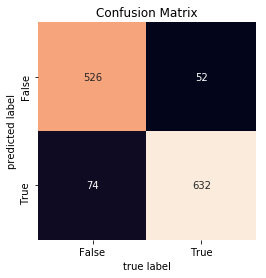

In [74]:
lucem_illud.plotConfusionMatrix(clf_nn, test_data_df)

In [ ]:
lucem_illud.plotregions(clf_nn, test_data_df)

## <font color="red">*Exercise 7*</font>

<font color="red">In the cells immediately following, use the pipeline functions or the word or sentence vector functions (e.g., similarity) to explore the social game underlying the production and meaning of texts associated with your final project. How does BERT help you gain insight regarding your research question that is similar and different from prior methods?

In [75]:
import ipywidgets as widgets
from IPython.display import display

In [109]:
from transformers import pipeline
nlp = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english)


In [99]:
df_short = fknews[:200]

In [88]:
nlp(fknews['tweet'][1])[0]

{'label': 'NEGATIVE', 'score': 0.9838776588439941}

In [94]:
fknews['tweet'][269]

'A growing number of states and cities are requiring a face covering for anyone leaving their home. Learn more about the best materials to make your own face mask and how to properly wear and care for them: https://t.co/oSTj2oqq3m'

In [100]:
df_short['sentiment'] = df_short['tweet'].apply(lambda x:nlp(x)[0])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
df_short['sentiment'] = df_short['sentiment'].apply(lambda x: x['label'])

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [102]:
df_short

,id,tweet,label,sentiment
0,1,The CDC currently reports 99031 deaths. In gen...,real,NEGATIVE
1,2,States reported 1121 deaths a small rise from ...,real,NEGATIVE
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake,NEGATIVE
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real,NEGATIVE
4,5,Populous states can generate large case counts...,real,NEGATIVE
...,...,...,...,...
195,196,STUDY: COVID was likely in the mix of Seattle’...,real,NEGATIVE
196,197,A photo shows people infected with coronavirus...,fake,NEGATIVE
197,198,#IndiaFightsCorona Active cases only 22% of to...,real,NEGATIVE
198,199,"""States like New York, Illinois and California...",fake,NEGATIVE


In [107]:
df_short[df_short['label']=='real'].groupby('sentiment').sum()

,id
sentiment,
NEGATIVE,9655
POSITIVE,2469


In [108]:
df_short[df_short['label']=='fake'].groupby('sentiment').sum()

,id
sentiment,
NEGATIVE,7031
POSITIVE,945


The proportion of negative news is larger for fake news than real news for this pilot dataset.